In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

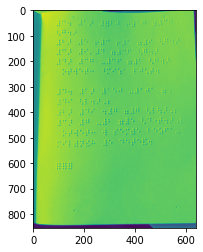

In [7]:
img = cv2.imread('../data/Photo_Turlom_C1_2.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

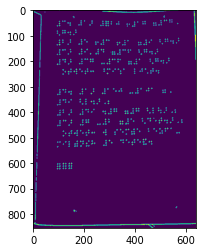

In [8]:
im = cv2.blur(img,(3,3)) # GaussianBlur(imgGrayscale, imgGrayscale, new Size(3, 3), 0);
im = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 5, 4)
im = cv2.medianBlur(im, 3)
_,im = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU)
im = cv2.GaussianBlur(im, (3,3), 0)
_,im = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU)
plt.imshow(im)

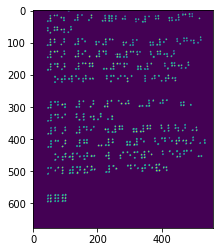

In [9]:
cim = im[27:-150,50:-30]
plt.imshow(cim)

In [10]:
orb = cv2.ORB_create(5000)
f,d = orb.detectAndCompute(cim,None)

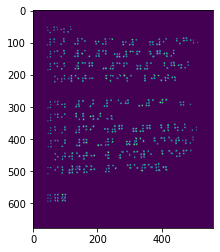

In [11]:
def plot_dots(im,dots):
    img = np.zeros_like(im)
    for x in dots:
        cv2.circle(img,(int(x[0]),int(x[1])),1,(255,0,0))
    plt.imshow(img)

pts = [x.pt for x in f]
plot_dots(cim,pts)  

In [12]:
min_x, min_y, max_x, max_y = \
[int(f([z[i] for z in pts])) for f in (min,max) for i in (0,1)]
print(min_x,max_x)
print(min_y,max_y)

44 512
51 593


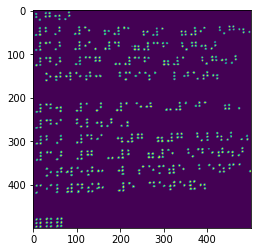

In [14]:
off = 5
src_pts = np.array([(min_x-off,min_y-off),(min_x-off,max_y+off),
                    (max_x+off,min_y-off),(max_x+off,max_y+off)])
dim = 500
dst_pts = np.array([(0,0),(0,dim),(dim,0),(dim,dim)])
h,m = cv2.findHomography(src_pts,dst_pts)
trim = cv2.warpPerspective(cim,h,(dim,dim))
plt.imshow(trim)

In [16]:
char_h = 10
char_w = 10
def slice(img):
    dy,dx = img.shape
    y = 0
    while y+char_h<dy:
        x=0
        while x+char_w<dx:
            yield img[y:y+char_h,x:x+char_w]
            x+=char_w
        y+=char_h

sliced = list(slice(trim))[0:100]

In [ ]:
fig,ax = plt.subplots(10,10)
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(sliced[i*10+j])
pl